In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
# Load The Dataset
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
# Check first 5 rows of the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Check the shape of the data
df_train.shape

(891, 12)

In [6]:
# Check all data (mean, min,max etc) 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check the data types of all columns in dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check how many passengers on Ship
print("Total Passenger : ",len(df_train["PassengerId"]))

Total Passenger :  891


In [9]:
# Check how many survived or how many not survived
survived = df_train[df_train["Survived"]==1]
not_survived = df_train[df_train["Survived"]==0]

In [10]:
print(f"Total Passenger Who Survived : {len(survived)}")
print(f"Total Passener Who Not Survived : {len(not_survived)}")

Total Passenger Who Survived : 342
Total Passener Who Not Survived : 549


In [11]:
print("Survived % = ",1*len(survived)/len(df_train)*100)
print("Not Survived % = ",1*len(not_survived)/len(df_train)*100)

Survived % =  38.38383838383838
Not Survived % =  61.61616161616161


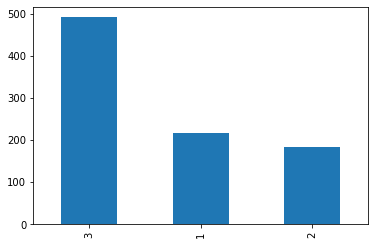

In [12]:
# Check which class has more passengers and check how much this impact on survived or not_survived
df_train["Pclass"].value_counts().plot(kind="bar")

## We can see those who stay in Pclass 1 and 2 Are More Survived but those who have Pclass 3 are not more survived rate

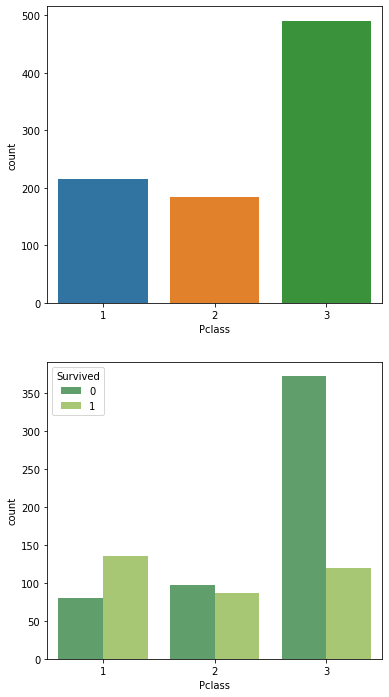

In [13]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="Pclass",data=df_train)
plt.subplot(212)
sns.countplot(x="Pclass",data=df_train,hue="Survived",palette="summer")

## Sex is more impact we can see female surviving rate is more than male surviving rate

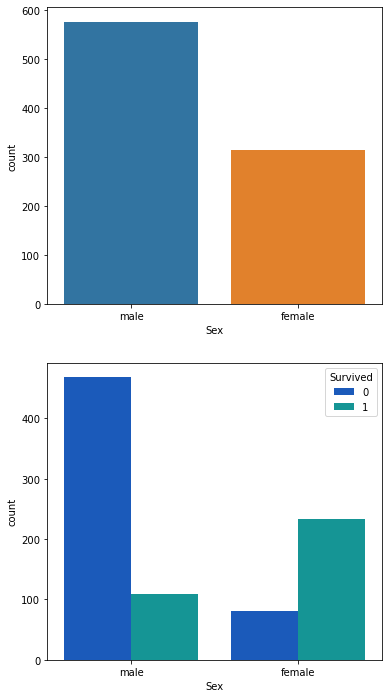

In [14]:
## Check how much sex can impact on survived or not_survived
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x="Sex",data=df_train)
plt.subplot(212)
sns.countplot(x="Sex",data=df_train,hue="Survived",palette="winter")

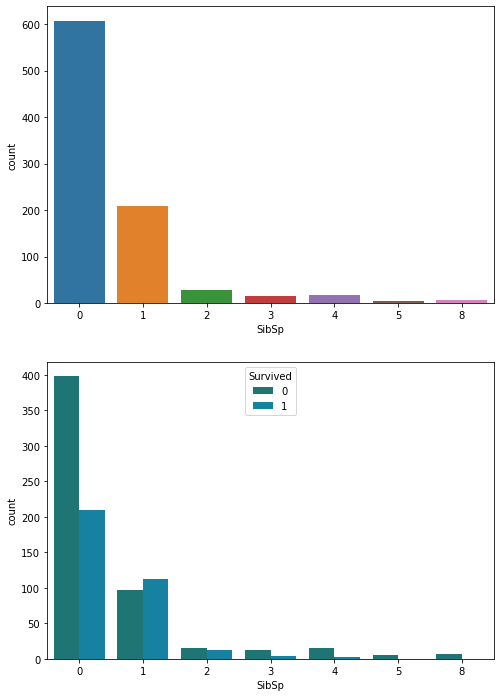

In [15]:
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.countplot(x="SibSp",data=df_train)
plt.subplot(212)
sns.countplot(x="SibSp",data=df_train,hue="Survived",palette="winter_d")

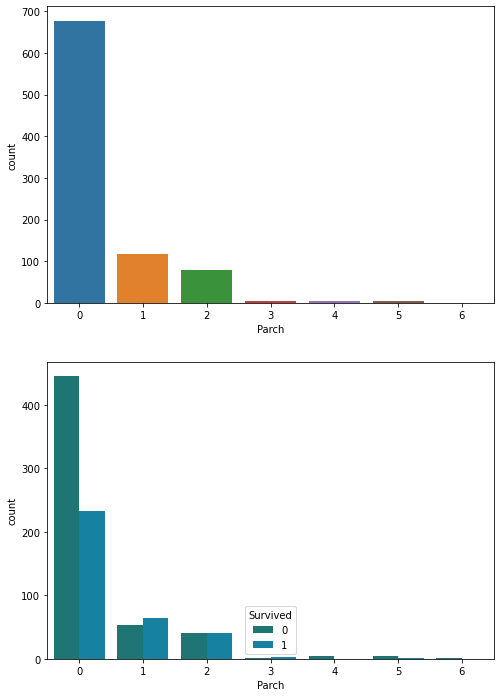

In [16]:
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.countplot(x="Parch",data=df_train)
plt.subplot(212)
sns.countplot(x="Parch",data=df_train,hue="Survived",palette="winter_d")

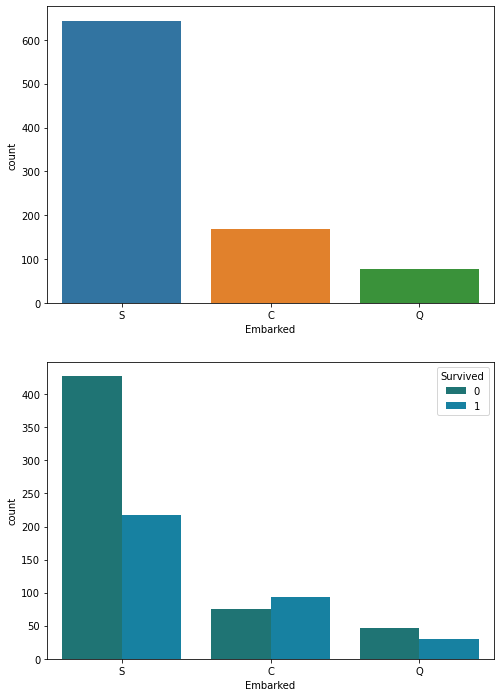

In [17]:
plt.figure(figsize=(8,12))
plt.subplot(211)
sns.countplot(x="Embarked",data=df_train)
plt.subplot(212)
sns.countplot(x="Embarked",data=df_train,hue="Survived",palette="winter_d")

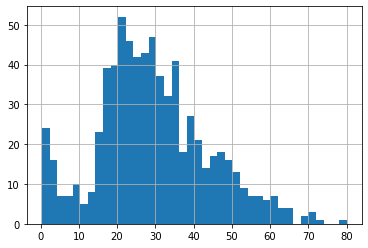

In [18]:
# Check the histogram of Age
df_train["Age"].hist(bins=40)

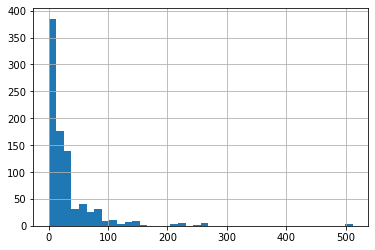

In [19]:
# Check the histogram of Fare
df_train["Fare"].hist(bins=40)

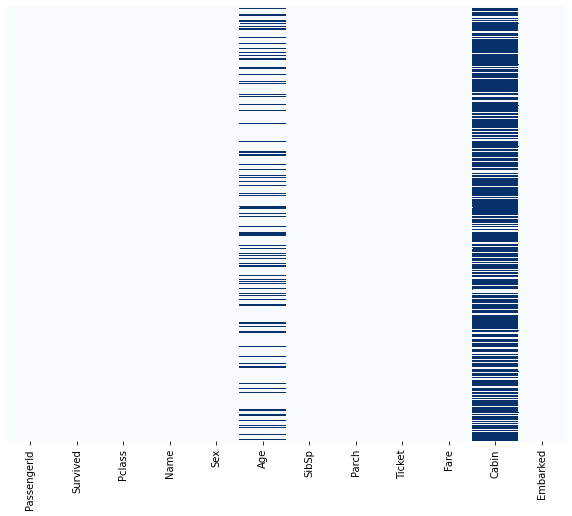

In [20]:
# Check how many null values have in data
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [21]:
## Those column who is True are null values columns and second print showing null values columns
print(df_train.isna().any())
print(df_train.loc[:,df_train.isna().any()])

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
      Age Cabin Embarked
0    22.0   NaN        S
1    38.0   C85        C
2    26.0   NaN        S
3    35.0  C123        S
4    35.0   NaN        S
..    ...   ...      ...
886  27.0   NaN        S
887  19.0   B42        S
888   NaN   NaN        S
889  26.0  C148        C
890  32.0   NaN        Q

[891 rows x 3 columns]


In [22]:
# Now drop unussual columns like Cabin,Name,PassengerId,Ticket because this are not so useful..
df_train.drop(["Ticket","PassengerId","Name","Cabin"],axis=1,inplace=True)
df_test.drop(["Ticket","PassengerId","Name","Cabin"],axis=1,inplace=True)

In [23]:
# Check the first 5 rows of data for verify that column successfull dropped
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
# Groupby Age With Sex And Check the mean of male age and female age for fill nan(null) values
df_train.groupby("Sex").agg({"Age":["mean"]})

,Age
,mean
Sex,
female,27.915709
male,30.726645


In [25]:
df_test.groupby("Sex").agg({"Age":["mean"]})

,Age
,mean
Sex,
female,30.272362
male,30.272732


In [26]:
# Create def fucntion for filling nan values of age
def fill_age(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex is "male":
            return 30
        else:
            return 27
    else:
        return age

In [27]:
def fill_age_test(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex is "male":
            return 30
        else:
            return 30
    else:
        return age

In [28]:
# Now fill the nan values of age with mean of male and female
df_train["Age"] = df_train[["Age","Sex"]].apply(fill_age,axis=1)
df_test["Age"] = df_test[["Age","Sex"]].apply(fill_age_test,axis=1)

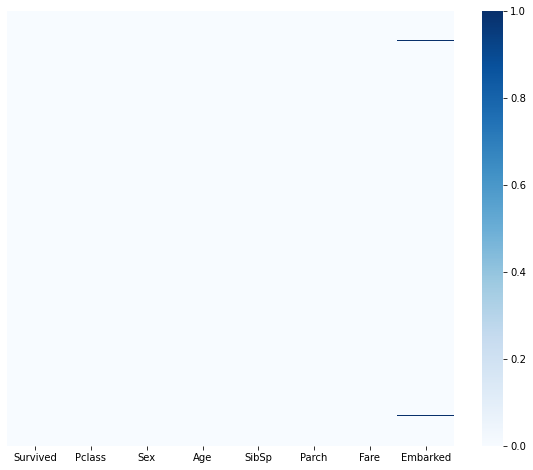

In [29]:
# Now verify nan values filled
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [30]:
df_train.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

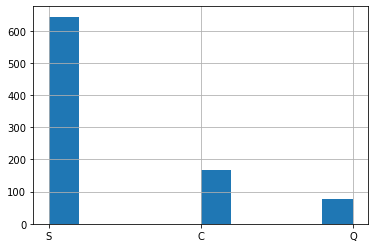

In [31]:
# Now check histogram of Embarked and check which Embarked have more passenger then fill then nan value
df_train["Embarked"].hist()

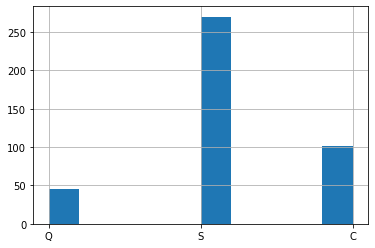

In [32]:
df_test["Embarked"].hist()

In [33]:
## Embarked S Have More Passengers So That's why we choose Emabarked S For fill nan data
print(df_train["Embarked"].value_counts())
print(df_train["Embarked"].value_counts().idxmax())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S


In [34]:
df_train["Embarked"].replace(np.nan,"S",inplace=True)
df_test["Embarked"].replace(np.nan,"S",inplace=True)

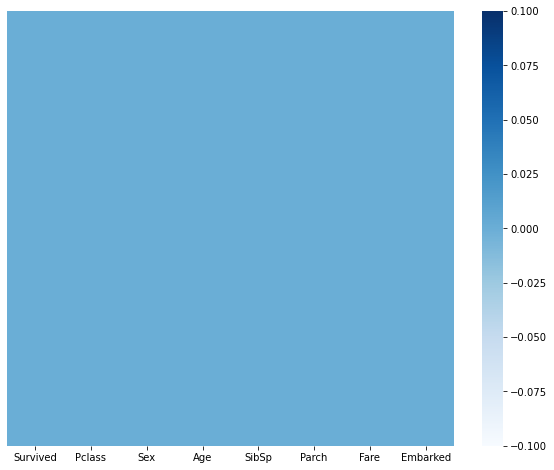

In [35]:
# Now verify nan Data filled or not
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True,cmap="Blues")

In [36]:
# So We Successfully removed all missing value from data and drop unussual columns
df_train.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [37]:
df_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [38]:
fare = df_test["Fare"].astype("float64").mean(axis=0)
fare

35.6271884892086

In [39]:
df_test["Fare"].replace(np.nan,fare,inplace=True)

In [40]:
df_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [41]:
df_test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [42]:
# Now check dtypes of all columns
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [43]:
# So we have to convert object = int or float because sklearn not take objects only take numeric values like int,float etc

In [44]:
# Create dummy variable for Sex
sex_variable = pd.get_dummies(df_train["Sex"],drop_first=True)
sex_variable

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [45]:
# Now conat the sex_vaiable with df_train and drop the Sex columns
df_train = pd.concat([df_train,sex_variable],axis=1)
df_train.drop("Sex",axis=1,inplace=True)

In [46]:
# Verify the data correct or not
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [47]:
sex_variable = pd.get_dummies(df_test["Sex"],drop_first=True)

In [48]:
df_test = pd.concat([df_test,sex_variable],axis=1)
df_test.drop("Sex",axis=1,inplace=True)

In [49]:
# Create dummy variable for Embarked
embarked_var = pd.get_dummies(df_train["Embarked"],drop_first=True)
embarked_var

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [50]:
# Now conat the embarked_var with df_train and drop the Embarked columns
df_train = pd.concat([df_train,embarked_var],axis=1)
df_train.drop("Embarked",axis=1,inplace=True)

In [51]:
# Verify the data correct or not
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [52]:
# Now Change the column name of Q and S with Embarked_Q and Embarked_S
df_train = df_train.rename(columns={"Q":"Embarked_Q","S":"Embarked_S"})

In [53]:
# Now Check the data all are correct or not
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
embarked_var = pd.get_dummies(df_test["Embarked"],drop_first=True)

In [55]:
df_test = pd.concat([df_test,embarked_var],axis=1)
df_test.drop("Embarked",axis=1,inplace=True)

In [56]:
df_test = df_test.rename(columns={"Q":"Embarked_Q","S":"Embarked_S"})

In [57]:
# Now check the dtypes of all the columns all are good or not
df_train.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
male            uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [58]:
df_test.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
male            uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [59]:
X = df_train.drop("Survived",axis=1).values

In [60]:
y = df_train["Survived"].values

In [61]:
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [62]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
df_test = sc.fit_transform(df_test)

In [63]:
X

array([[ 0.82737724, -0.5493354 ,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.67772773,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.24256962, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.16587817,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.24256962, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.21757905, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254]])

In [64]:
df_test

array([[ 0.87348191,  0.33942386, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.32992353,  0.61699237, ..., -1.32287566,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.51852314, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.65638375, -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.01715602, -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.01715602,  0.61699237, ...,  0.75592895,
        -0.35164743, -1.35067551]])

In [65]:
# Model Training

In [66]:
lin_model = LogisticRegression(random_state=10)
lin_model.fit(X,y)

LogisticRegression(random_state=10)

In [67]:
Survived = lin_model.predict(df_test)

In [68]:
Survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
new_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [70]:
new_df.drop(["Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)

In [71]:
Survived = pd.DataFrame(Survived)

In [72]:
Survived

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [73]:
new_df = pd.concat([new_df,Survived],axis=1)

In [74]:
new_df = new_df.rename(columns={0:"Survived"})
new_df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [75]:
new_df.to_csv("titanic_submissions_1",index=False)